# Basic machine learning

Machine learning is a somewhat of a buzz term today, particularly a subset of it called deep learning or AI. But what is it?

Essentially, machine learning is just fancy statistics. We build models, some of which are the same as models we've already made in class, and we use these models to make predictions on new data. 

An important subset of machine learning is deep learning, also called AI, which uses algorithms designed to mimic the connection between neurons. However, at their base, deep learning is essentially just a fancy regression.

There are a wide variety of algorithms in machine learning, and there are many ways to group them. One such is way is to group them into **regression** versus **classification** algorithms. Regression algorithms do what we have already done with linear regression: use information in a data set to predict a continuous variable, which in machine learning is called the **target** variable. Classification is essentially the same, except that the target variable is **categorical**.

To do machine learning, we will be use a very useful package called [`scikit-learn`](https://scikit-learn.org/stable/index.html), which has everything we need to get started with basic machine learning. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

penguins = pd.read_csv('../data/penguins.csv')
penguins.head()


Our data set has missing data. `scikit-learn` doesn't handle missing data as well as some of the libraries we've used before. 

In [27]:
penguins = penguins

We also need to take the target variable out of rest of the data set. We label the target variable as `y`, and the remaining variables as `X`. We often call `X` our features or our feature set. 

`scikit-learn` also does not not automatically make dummy variables,so we need to do this ourselves.

## Training and test data

A key differentiator between machine learning and a standard regression approach is with the way we fit our model.

In the regression we've done in the past, we use all of our data to fit our model. This gives us the most power to test our hypotheses and determine whether or not our data show that there are relationships between variables.

In machine learning, the emphasis is less on describing these relationships and testing hypotheses, and more on prediction. We want to make sure that when we give our model new information, it makes accurate predictions.

We do this by fitting our model on only part of our data, instead of all of it. We call this subset the **training set**. 

What this allows us to do is use the remainder of the data set to test how good our model was. We call the remaining data the **test set**, and we want our model to make good prediction on the test set, despite having never seen those data before.

The train-test split is randomly generated from our data set with a 75-25 split. We can manually change this proportion, as well as providing a random seed to make sure you get the same split each time.

## Linear regression but machine learning

We can actually use the exact same algorithms we used for standard linear regression, but with a machine learning approach.

OLS works the same using all of our data versus just our training set. However, we'll use the `scikit-learn` version. 

We can use `.score()` to see how well our model does. For regression models, this method returns the R-squared for the X and y data you give it. 

We can take a look at the size of the coefficients in our model to see how each variable is affecting the model.

In [2]:
coefficients = model.coef_

fig, ax = plt.subplots(figsize=(10,5))
# bar plot 
plt.xticks(rotation=45);

## Other algorithms

Some data will be difficult for linear regression to handle. These can include data that have complex or non-linear relationships.

One such algorithm is called **decision trees**. This algorithm takes our data and splits it into two branches. For instance, we could split our data into samples that are the species Gentoo, and samples that aren't, and make a prediction based on this distinction. These predictions are called the **leaves** of the tree.

![Decision tree](../images/Decision_trees_depth1.png)

Decision trees can also have more layers and splits. In this way, we can have leaves with fewer samples and more specific predictions. 

![Decision tree depth 2](../images/Decision_trees_depth2.png)

The more splits a tree has, the higher **depth** it has. The actual splits will be determined by the data you have. 

On their own, decision trees tend to perform poorly. However, when you train many trees as use them together, they can perform much better. One such machine learning algorithm that does is called **random forest regression**. This algorithm trains many decision trees and uses each tree essentially as a vote for what the final prediction is. 



In [36]:
# random forest

RandomForestRegressor()

We can still use the same scoring function, giving us the R-squared of our model for training and test set.

You'll notice that our model was nearly perfect at predicting the training set, but performs about as well on the test set. 

Model selection is a very key part of machine learning. Here, we see that our random forest model performed no better on the test set than the linear regression model did. This suggests that the relationships in our data are relatively simple. However, there are many machine learning algorithms out there (SVM, gradient boosted trees, deep learning models, etc.) to consider, and each have situations where they might perform better than the other. A key point in many machine learning algorithms is samples size: the more complex the algorithm, the larger the sample size you'll need to take advantage of it. 

## Forecasting with Machine Learning

We can also use a machine learning approach to forecasting. Here, we can make a training test split, but we shouldn't make it random. Instead, we can make the first part of the time series the training set, and the latter part the test set. 

Our model will only be trained on the training set, and we can use the test set to see how well our model performed. 

In [39]:
us_temp = pd.read_csv('../data/usa-annual-temp.csv')
us_temp.head()

,year,temp
0,1901,8.59
1,1902,8.39
2,1903,7.95
3,1904,8.09
4,1905,8.40


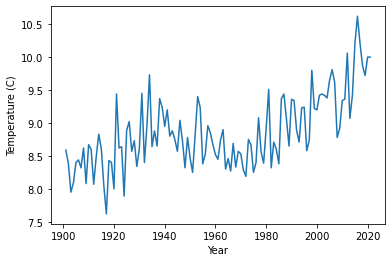

In [40]:
us_temp['year'] = pd.to_datetime(us_temp['year'], format='%Y')
us_temp = us_temp.set_index('year')

fig, ax = plt.subplots()
ax.plot(us_temp)
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (C)');

We can split our data into training and test sets manually here, but again, we want our training set to be the first part of the time series, and the test set to be the end. We have about a 75:25 split here. 

We can then fit the model to the training set. 

In [3]:
from pmdarima import auto_arima

auto_arima_model = auto_arima( )
auto_arima_model.summary()

In [43]:
# training prediction

In [44]:
# test prediction

In [4]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(us_temp,label='Observed Data')
ax.plot(predict_train[1:], label='Training Prediction')
ax.plot(predict_test, label='Test Prediction')
ax.fill_between(predict_test.index, ci[:,0], ci[:,1], color = 'gray', alpha=0.5)
ax.legend();


Our model performs decently for several years but slowly begins to perform more poorly over time. Predicting the future is inherently difficult, and the further out you go, the more difficult it becomes. 

This can especially be the case when the data in the training set do not resemble the test set. The increasing trend in the test set does not resemble the training set. A model can only be as good as the data you provide it. 

There are also more powerful ways to build machine learning forecasting models. For more information, you can view [this article from Kaggle](https://www.kaggle.com/code/ryanholbrook/forecasting-with-machine-learning#Defining-the-Forecasting-Task).

## Some resources

A lot of machine learning is understanding why your model didn't perform as well as it could have, and making changes to account for that. These changes can come in a lot of different flavors, and it takes a lot of practice to know what direction to go. But it also takes being willing to play around with your data to see which levers to pull.

Below are a bunch of resources on various topics in machine learning. The field of machine learning is very vast, but you can learn a lot by just dipping your toes in the water in a narrow topic, and then slowly expanding outward from it.

- [Classification vs Regression](https://machinelearningmastery.com/classification-versus-regression-in-machine-learning/)
- [Supervised vs unsupervised learning](https://www.ibm.com/cloud/blog/supervised-vs-unsupervised-learning)
- [Hyperparameter tuning](https://www.jeremyjordan.me/hyperparameter-tuning/)
- [Tensorflow for deep learning](https://www.tensorflow.org/)
- [Scikit-learn preprocessing pipelines](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing)
- [Picking the right machine-learning algorithm](https://www.analyticsvidhya.com/blog/2021/07/how-to-choose-an-appropriate-ml-algorithm-data-science-projects/)
- [Ethics of machine learning and AI](https://www.nature.com/articles/s41599-020-0501-9)

![](https://staticc.sportskeeda.com/editor/2023/04/dd4c6-16805319883703-1920.jpg?w=840)

*Harry Potter by Balenciaga, a silly example of the power of the emerging techology of AI/DL.*